# Loading dataset

In [1]:
import kagglehub
dataset_path1 = kagglehub.dataset_download("shivam1711/hand-sign-language-digit-dataset-for-0-5")
print("Path to dataset files:", dataset_path1)

Path to dataset files: /kaggle/input/hand-sign-language-digit-dataset-for-0-5


In [2]:
import os
import numpy as np
import cv2
import kagglehub

In [3]:
dataset_path1 = "/kaggle/input/hand-sign-language-digit-dataset-for-0-5"

In [4]:
class_names1 = ['0', '1', '2', '3', '4', '5']

In [5]:
def load_images_from_directory(base_path, class_names, target_size=(224, 224)):
    image_data = []
    labels = []

    for category in class_names:
        category_path = os.path.join(base_path, category)
        if not os.path.isdir(category_path):
            continue
        label = class_names.index(category)
        for file in os.listdir(category_path):
            file_path = os.path.join(category_path, file)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                img = img / 255.0
                image_data.append(img)
                labels.append(label)

    image_data = np.array(image_data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)
    print(f"Loaded {len(image_data)} images.")
    return image_data, labels

In [6]:
images1, labels1 = load_images_from_directory(dataset_path1, class_names1)

Loaded 1237 images.


In [7]:
print("Total images loaded:", len(images1))

Total images loaded: 1237


In [8]:
print(images1[0], labels1[0])

[[[0.47843137 0.49019608 0.5058824 ]
  [0.47843137 0.49019608 0.5058824 ]
  [0.47843137 0.49411765 0.5058824 ]
  ...
  [0.46666667 0.46666667 0.49411765]
  [0.46666667 0.46666667 0.49019608]
  [0.46666667 0.46666667 0.49019608]]

 [[0.47843137 0.49019608 0.5058824 ]
  [0.47843137 0.49019608 0.5058824 ]
  [0.48235294 0.49411765 0.50980395]
  ...
  [0.47058824 0.47058824 0.49411765]
  [0.46666667 0.46666667 0.49019608]
  [0.46666667 0.46666667 0.49019608]]

 [[0.48235294 0.49019608 0.50980395]
  [0.48235294 0.49411765 0.50980395]
  [0.4862745  0.49411765 0.50980395]
  ...
  [0.47058824 0.47058824 0.49411765]
  [0.46666667 0.46666667 0.49019608]
  [0.46666667 0.46666667 0.49019608]]

 ...

 [[0.43529412 0.4627451  0.4745098 ]
  [0.4392157  0.46666667 0.4745098 ]
  [0.44313726 0.47058824 0.48235294]
  ...
  [0.42352942 0.44313726 0.45490196]
  [0.42352942 0.44313726 0.45490196]
  [0.42352942 0.4392157  0.4509804 ]]

 [[0.43137255 0.45882353 0.47058824]
  [0.43529412 0.4627451  0.4745098 ]


In [9]:
one_hot_labels = np.eye(len(class_names1), dtype='int')[labels1]

In [10]:
def print_class_distribution(labels, class_names):
    label_indices = [label.argmax() for label in labels]
    class_counts = Counter(label_indices)

    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {class_counts[i]} samples")

In [11]:
from collections import Counter

print_class_distribution(one_hot_labels, class_names1)

0: 205 samples
1: 206 samples
2: 206 samples
3: 206 samples
4: 207 samples
5: 207 samples


# Visualizing Samples

In [12]:
import matplotlib.pyplot as plt

def visualize_sign_samples(images, labels, class_names, samples_per_class=5):
    total_classes = len(class_names)
    fig, axes = plt.subplots(total_classes, samples_per_class, figsize=(samples_per_class * 2, total_classes * 2))
    fig.suptitle("Hand Sign Recognition Samples", fontsize=16)

    for class_idx in range(total_classes):
        # Find first `samples_per_class` indices for this class
        indices = [i for i, label in enumerate(labels) if label.argmax() == class_idx][:samples_per_class]

        for i, idx in enumerate(indices):
            ax = axes[class_idx, i] if total_classes > 1 else axes[i]
            ax.imshow(images[idx], cmap='gray' if images[idx].ndim == 2 else None)
            ax.axis('off')
            if i == 0:
                ax.set_ylabel(class_names[class_idx], fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


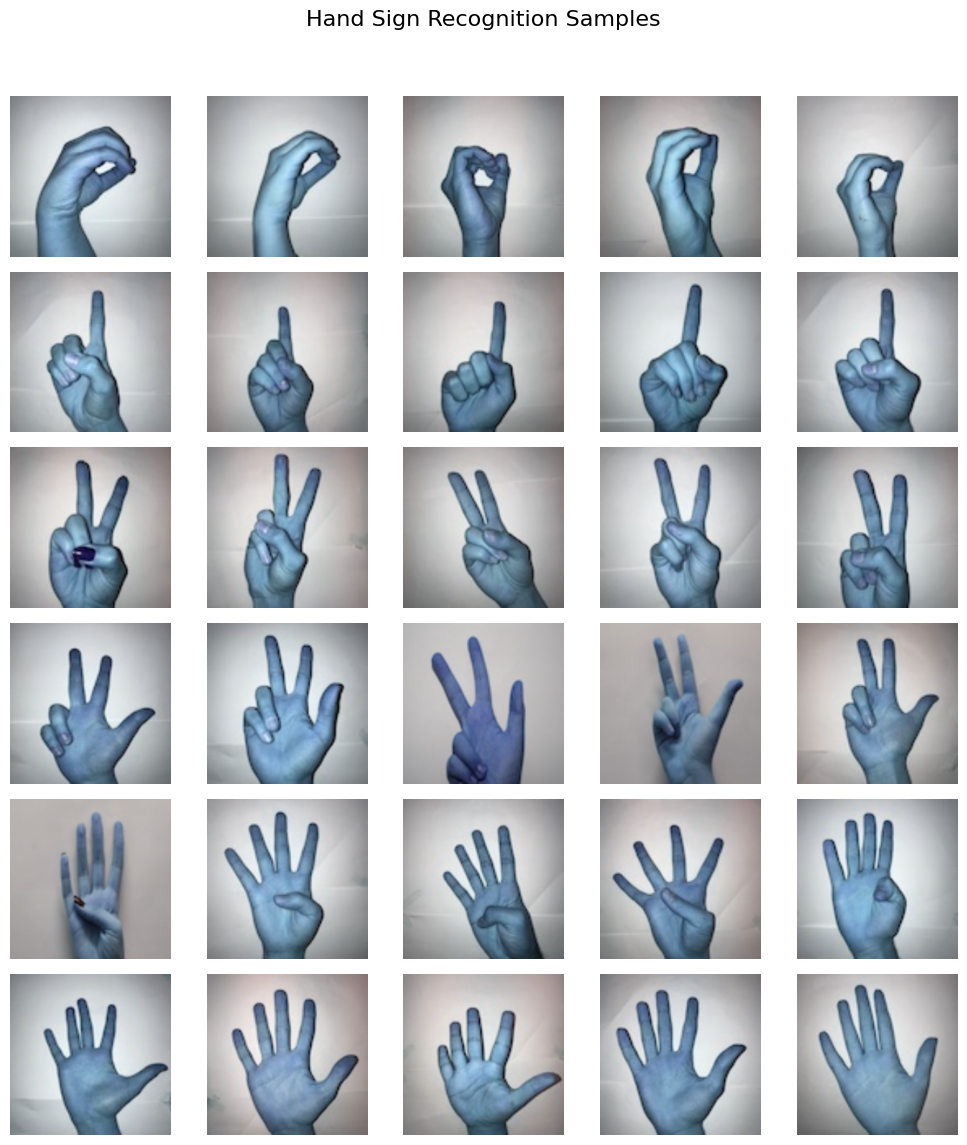

In [13]:
images_data = images1
visualize_sign_samples(images_data, one_hot_labels, class_names1)

# Making Data Ready for CNN

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Convert lists to NumPy arrays
X = np.array(images_data, dtype=np.float32)  # Convert images
y = np.array(one_hot_labels, dtype=np.int32)  # Convert labels

In [16]:
# Ensure correct shape for CNNs
X = X.reshape(-1, 224, 224, 3)  # Ensure (batch, height, width, channels)

In [17]:
# First, split into train (75%) and temp (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [18]:
# Now, split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [19]:
# Print dataset shapes
print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

Training Data: (927, 224, 224, 3), Labels: (927, 6)
Validation Data: (155, 224, 224, 3), Labels: (155, 6)
Test Data: (155, 224, 224, 3), Labels: (155, 6)


In [20]:
np.savez_compressed("hand_sign_dataset.npz",
                    X_train=X_train, y_train=y_train,
                    X_val=X_val, y_val=y_val,
                    X_test=X_test, y_test=y_test)

# Load saved data

In [21]:
data = np.load("hand_sign_dataset.npz")

X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]

# Training CNN

In [22]:
import tensorflow as tf

# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

# Configure GPU memory usage
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Allow dynamic memory allocation
        tf.config.set_visible_devices(gpus, 'GPU')  # Make sure only GPU devices are visible
        print("Using GPU(s):", gpus)
    except RuntimeError as e:
        print("RuntimeError:", e)
else:
    print("No GPU found. Running on CPU.")

2025-08-15 13:40:23.641979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755265223.852284      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755265223.915496      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available: 2
Using GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [23]:
num_classes = len(class_names1)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

I0000 00:00:1755265236.805442      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755265236.806132      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [25]:
import tensorflow as tf
from tensorflow.keras import layers as tfl
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras import Sequential, layers as tfl

HandSignNet = Sequential([
    tfl.Input(shape=(224, 224, 3)),
    data_augmentation,

    tfl.Conv2D(256, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),
    
    tfl.Conv2D(128, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Conv2D(128, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Conv2D(64, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Conv2D(64, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Conv2D(32, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Conv2D(32, 3, activation='relu', padding='same'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D((2, 2)),

    tfl.Flatten(),
    
    tfl.Dense(128, activation='relu'),
    tfl.Dropout(0.3),

    tfl.Dense(64, activation='relu'),
    tfl.Dropout(0.2),

    tfl.Dense(num_classes, activation='softmax'),
])

In [27]:
import numpy as np
from collections import Counter

# Assuming y_train is one-hot encoded, convert it to integer labels
y_train_labels = np.argmax(y_train, axis=1)
class_counts = Counter(y_train_labels)

print("Class counts:", class_counts)

Class counts: Counter({5: 155, 3: 155, 4: 155, 1: 154, 2: 154, 0: 154})


In [28]:
HandSignNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
HandSignNet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 603,910 (2.30 MB)

 Trainable params: 602,502 (2.30 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [30]:
history_HandSignNet = HandSignNet.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,             
    batch_size=16,
)

Epoch 1/20


I0000 00:00:1755265248.501785     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.2472 - loss: 1.8464 - val_accuracy: 0.1677 - val_loss: 1.8077
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 267ms/step - accuracy: 0.5590 - loss: 1.0922 - val_accuracy: 0.1677 - val_loss: 2.0513
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 270ms/step - accuracy: 0.6938 - loss: 0.7877 - val_accuracy: 0.1677 - val_loss: 2.2591
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.7836 - loss: 0.5356 - val_accuracy: 0.1677 - val_loss: 3.1720
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.8823 - loss: 0.3560 - val_accuracy: 0.1677 - val_loss: 3.2044
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 276ms/step - accuracy: 0.8540 - loss: 0.3769 - val_accuracy: 0.1677 - val_loss: 3.6493
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.8984 - loss: 0.2564 - val_accuracy: 0.3226 - val_loss: 2.2877
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.9272 - loss: 0.2504 - val_accuracy: 0.754

In [31]:
HandSignNet.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.9978 - loss: 0.0413


[0.06001982092857361, 0.9935483932495117]

## Evaluting the CNN Model

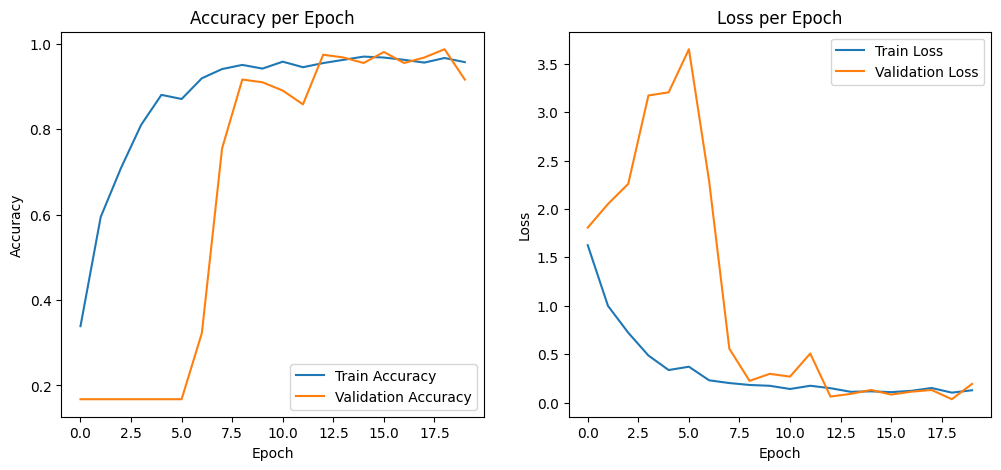

In [32]:
# --- Plot training and validation accuracy ---

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_HandSignNet.history['accuracy'], label='Train Accuracy')
plt.plot(history_HandSignNet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_HandSignNet.history['loss'], label='Train Loss')
plt.plot(history_HandSignNet.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation or test set
y_pred = HandSignNet.predict(X_val)  

# Convert predictions from probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_val, axis=1)  

# Print precision, recall, f1-score for each class
print(classification_report(y_true_classes, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.83      0.92      0.87        26
           2       0.86      0.92      0.89        26
           3       1.00      0.88      0.94        25
           4       0.92      0.92      0.92        26
           5       1.00      0.96      0.98        26

    accuracy                           0.92       155
   macro avg       0.92      0.92      0.92       155
weighted avg       0.92      0.92      0.92       155



In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image dimensions (same as during training)
image_height, image_width = 224, 224

# Load and preprocess image
img_path = "/kaggle/input/images-for-testing/1_sign(1).jpg"
img = image.load_img(img_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize if you did it during training
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict using the trained model
prediction = HandSignNet.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

print("Predicted class:", predicted_class)
print("Softmax scores:", prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted class: 1
Softmax scores: [4.6833280e-01 5.2093160e-01 6.7352345e-03 1.7463471e-03 2.0477024e-03
 2.0633885e-04]


In [36]:
HandSignNet.save("HandSignNet_CNN-model.h5") 

# Training ReseNet50

## Phase 1: Training a frozen ResNet50 base with a custom dense head for 6-class image classification.  


In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = tfl.GlobalAveragePooling2D()(base_model.output)
x = tfl.Dense(6, activation='softmax')(x)
resNet50 = Model(inputs=base_model.input, outputs=x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
resNet50.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

In [39]:
history_resNet50 = resNet50.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=16,
                   )

Epoch 1/15


I0000 00:00:1755265684.440652     101 service.cc:148] XLA service 0x4948d1f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755265684.441829     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755265684.441850     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755265706.374466     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/58 ━━━━━━━━━━━━━━━━━━━━ 108s 664ms/step - accuracy: 0.8139 - loss: 0.6322 - val_accuracy: 0.1677 - val_loss: 1.9461
Epoch 2/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.1677 - val_loss: 2.0085
Epoch 3/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.1677 - val_loss: 2.1364
Epoch 4/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.1677 - val_loss: 2.2147
Epoch 5/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9938 - loss: 0.0144 - val_accuracy: 0.1677 - val_loss: 2.0503
Epoch 6/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.1742 - val_loss: 2.0623
Epoch 7/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9974 - loss: 0.0147 - val_accuracy: 0.1677 - val_loss: 2.1740
Epoch 8/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9975 - loss: 0.0062 - val_accuracy: 0.16

## Phase 2: Fine-tuning the ResNet50

In [40]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

resNet50.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = resNet50.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,
)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 285ms/step - accuracy: 0.9847 - loss: 0.0744 - val_accuracy: 0.9935 - val_loss: 0.0619
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9916 - loss: 0.0457 - val_accuracy: 0.9935 - val_loss: 0.0301
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9977 - loss: 0.0127 - val_accuracy: 0.9935 - val_loss: 0.0180
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9985 - loss: 0.0089 - val_accuracy: 0.9935 - val_loss: 0.0115
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9935 - val_loss: 0.0083
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 1.0000 - loss: 8.9217e-04 - val_accuracy: 1.00

In [41]:
test_loss, test_acc = resNet50.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0017 
Test Accuracy: 1.0000, Test Loss: 0.0018


## Evaluting the ResNet50 after Fine-Tuning

In [42]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = resNet50.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



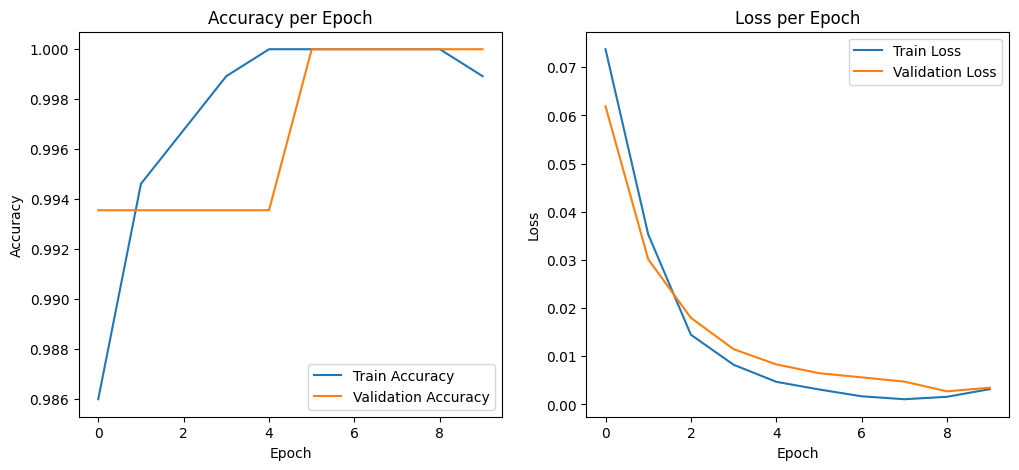

In [43]:
# --- Plot training and validation accuracy after Fine-Tuning ---

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image dimensions (same as during training)
image_height, image_width = 224, 224

# Load and preprocess image
img_path = "/kaggle/input/images-for-testing/4_sign(5).jpg"
img = image.load_img(img_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize if you did it during training
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict
prediction = resNet50.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
print("Predicted class:", predicted_class)
print("Softmax scores:", prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: 4
Softmax scores: [2.3639845e-03 5.5709988e-04 1.0163934e-02 5.2854174e-04 9.8592120e-01
 4.6519257e-04]


In [45]:
resNet50.save("resnet50_model.h5") 

## Downloading the ResNet50 model

In [48]:
!zip resnet50_model.zip resnet50_model.h5
from IPython.display import FileLink
FileLink('resnet50_model.zip')

  adding: resnet50_model.h5 (deflated 7%)


/kaggle/working/resnet50_model.zip